<a href="https://colab.research.google.com/github/dhtmddms/google_drive/blob/main/machine_learning_book/ch03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비 

In [ ]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

# 훈련세트와 테스트데이터셋 분리 

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
    )
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((42,), (42,), (14,), (14,))

- reshape() 사용하여 2차원 배열로 바꾸기

In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


# 모델 만들기

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# knn클래스 불러오기
knr = KNeighborsRegressor(n_neighbors=3)

# 모형 학습
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

# 예측
- p 132

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


# 시각화
- [과제] 객체 지향으로 변경하기

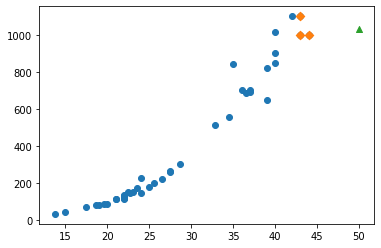

In [ ]:
import matplotlib.pyplot as plt

# 50cm농어의 이웃을 구하라
distances, indexes = knr.kneighbors([[50]])

# 훈련세트의 산점도를 구하라
fig, ax = plt.subplots()
ax.scatter(train_input, train_target)
ax.scatter(train_input[indexes], train_target[indexes], marker = 'D')
ax.scatter( 50, 1033, marker='^')
plt.show()

- 머신러닝 모델은 주기적으로 훈련해야 합니다.
  + MLOps(Machine Learning &O perations) 
  + 최근에 각광받는 데이터 관련 직업 필수 스킬
  + 입사와 함께 공부시작(데이터 분석가, 머신러닝 엔지니어, 데이터 싸이언티스트 희망자)

# 선형회귀(통계)
- 5가지의 가정들...
- 잔차의 정규성
- 등분산성, 다중공선성 ....
- 종속변수 ~ 독립변수 간의 '인과관계/를 찾는 과정

# 선형회귀(머신러닝)
- R2 점수, MAE, MSE... 같은 평가지표 확인이 더 중요
- 5가지의 가정들...
- 잔차의 정규성
- 등분산성, 다중공선성 ....
- 종속변수 ~ 독립변수 간의 '인과관계/를 찾는 과정

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어 예측
print(lr.predict([[50]]))

[1241.83860323]


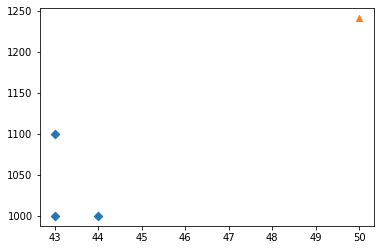

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_input[indexes], train_target[indexes], marker = 'D')
ax.scatter( 50, 1241, marker='^')
plt.show()

# 회귀식을 찾기

In [ ]:
# 기울기, 상수
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


- **기울기** : 계수, 가중치 (딥러닝)

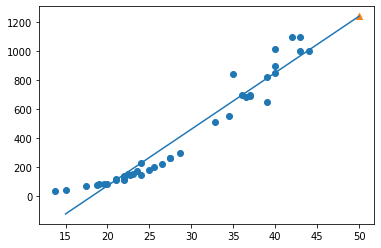

In [ ]:
fig, ax = plt.subplots()
ax.scatter(train_input, train_target)

# 15~50까지의 1차 방정식 그래프를 그린다. 
ax.plot([15, 50], 
         [15 * lr.coef_ + lr.intercept_, 
          50 * lr.coef_ + lr.intercept_])

ax.scatter(50, 1241.8, marker='^')

plt.show()

- 모형 평가(138p)
  + 과소적합이 됨


# 다항회귀의 필요성
- 치어를 생각해보자
- 치아가 1cm 

In [ ]:
print(lr.predict([[1]]))

[-670.00149999]


- p 140, 1차 방정식을 2차 방정식으로 만드는 과정이 나옴
- 넘파이 브로드캐스팅
  + 배열의 크기가 동일하면 상관없음
  + 배열의 크기가 다른데, 연산을 할 때, 브로드캐스팅 원리가 저용
  + 브로드캐스팅 튜토리얼 공부 필요

In [ ]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [ ]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


# 요약
- KNN 의 문제점
  + 농어의 길이가 커져도 무게는 동일함 (현실성 제로)
- 단순 선형회귀의 문제점
  + 치어(1cm)의 무게가 음수로 나옴(현실성 제로)
- 다항 회귀(2차 방정식)로 변경
  + 현실성 있음